Gradient Boosted Machines trained on data subsets

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
#from sklearn.tree import DecisionTreeRegressor
#from sklearn import tree
from sklearn import metrics
#from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.utils import shuffle
import seaborn as sns
import glob
import os
from dataCleaning import bas_filter
%matplotlib inline

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Summer 2017 Training Data

Trained plant with 2017 May, June, and July minute data
Tested data from the rest of the year

In [2]:
lst_train = ['Plt1 m 2017-05.csv', 'Plt1 m 2017-06.csv', 'Plt1 m 2017-07.csv']
lst_test = [
    'Plt1 m 2016-11.csv', 'Plt1 m 2016-11.csv', 'Plt1 m 2017-01.csv',
    'Plt1 m 2017-02.csv', 'Plt1 m 2017-03.csv', 'Plt1 m 2017-04.csv',
    'Plt1 m 2017-08.csv', 'Plt1 m 2017-09.csv', 'Plt1 m 2017-10.csv'
]

In [3]:
df_train, df_test = bas_filter.train_single_plt(
    '../../Plt1', lst_train, lst_test,
    '../../Plt1/Plt1 Points List.xlsx',
    include_alarms=False, dim_remove=['CHWST', 'CDWVLV']
)
df_test.shape

Filtering Training Set
['../../Plt1\\Plt1 m 2017-05.csv']
['../../Plt1\\Plt1 m 2017-06.csv']
['../../Plt1\\Plt1 m 2017-07.csv']
Descriptors in the points list that are not in the datasets.
CommunicationFailure_COV
CH3COM1F
CH3Ready
CH4COM1F
CH4Ready
CH4SURGE
CH5COM1F
CH5Ready
Original data contains 26496 points and 413 dimensions.
A CDWP3SPD_Alarm was noted and 8581 datapoints were removed from the dataset.
A CDWP4SPD_Alarm was noted and 9 datapoints were removed from the dataset.
A CDWP5SPD_Alarm was noted and 2381 datapoints were removed from the dataset.
A CH3_CHWSTSP_Alarm was noted and 6 datapoints were removed from the dataset.
A CH3ALARM was noted and 3634 datapoints were removed from the dataset.
A CH4ALARM was noted and 27 datapoints were removed from the dataset.
A CH4F was noted and 814 datapoints were removed from the dataset.
A PCHWP3Failed was noted and 793 datapoints were removed from the dataset.
Filtered data contains 9793 points and 164 dimensions.
Filtering Test Set


(25989, 164)

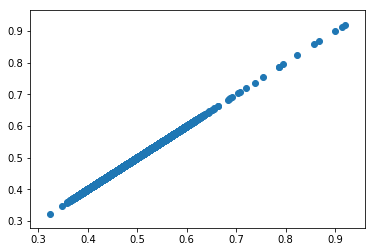

In [4]:
plt.scatter(df_train['kW/Ton'], df_train['kW/Ton'])

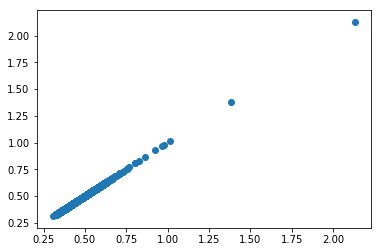

In [5]:
plt.scatter(df_test['kW/Ton'], df_test['kW/Ton'])

In [6]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [12]:
model_summer = GradientBoostingRegressor(**params)

In [13]:
ytrain = df_train['kW/Ton'].values
ytest = df_test['kW/Ton'].values
xtrain = df_train.drop(['kW/Ton'], axis=1).values
xtest = df_test.drop(['kW/Ton'], axis=1).values

In [14]:
xtrain.shape

(9793, 163)

In [15]:
ytrain.shape

(9793,)

In [16]:
model_summer.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [17]:
ypred = model_summer.predict(xtest)

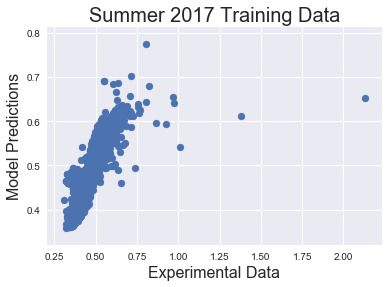

In [18]:
sns.set()
plt.figure()
plt.scatter(ytest, ypred)
fs = 20
plt.title("Summer 2017 Training Data", fontsize=fs)
plt.xlabel("Experimental Data", fontsize=fs-4)
plt.ylabel("Model Predictions", fontsize=fs-4)
plt.savefig('r2_values_summer.png', bbox_inches='tight')

R2 value

In [19]:
test_score = r2_score(ytest, ypred)
test_score

0.7870456737005027

Feature Importance

In [20]:
feature_importance = model_summer.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
x = df_test.drop(['kW/Ton'], axis=1).columns[sorted_idx]
imp = feature_importance[sorted_idx]

In [21]:
df_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [22]:
df_feats

,feat_import,feature_name
0,0.000000,CDWVLV2
1,0.000000,SCHWP3SS
2,0.000000,SCHWP4S
3,0.000000,SCHWP4SS
4,0.000000,CDWP4HZ
5,0.000000,CDWP5S
6,0.000000,CDWP5SS
7,0.000000,CT4EVLV
8,0.000000,CT4S
9,0.000000,CT4SS


In [23]:
df_feats.to_csv('Feat_imp_summer_test.csv')